In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Diabetes_XTrain.csv to Diabetes_XTrain.csv
Saving Diabetes_YTrain.csv to Diabetes_YTrain.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dfx=pd.read_csv("Diabetes_XTrain.csv")
dfy=pd.read_csv("Diabetes_YTrain.csv")
dfx.head(n=5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [ ]:
dfy.head(n=5)

,Outcome
0,1
1,0
2,1
3,1
4,0


In [ ]:
dfx.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


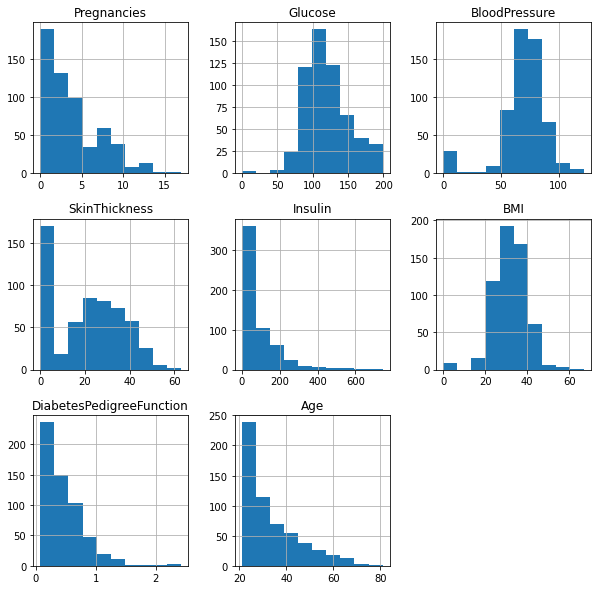

In [ ]:
p = dfx.hist(figsize = (10,10))

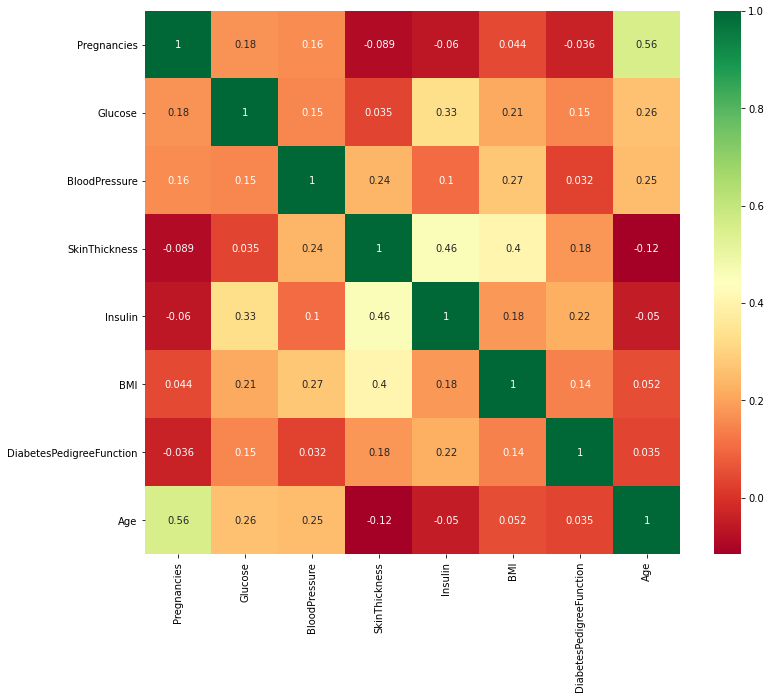

In [ ]:
plt.figure(figsize=(12,10))  
p=sns.heatmap(dfx.corr(), annot=True,cmap ='RdYlGn')

In [ ]:
X=dfx.values
y=dfy.values
 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42 )
print(X_train.shape)
print(y_train.shape)

(460, 8)
(460, 1)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


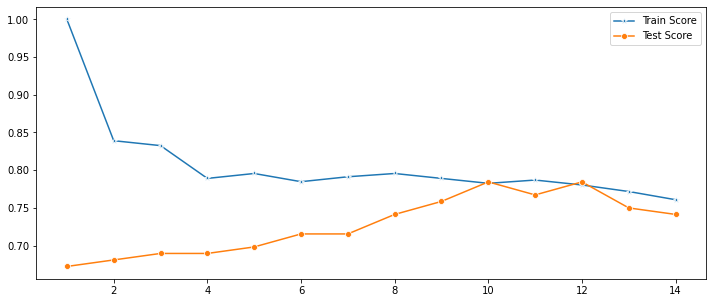

In [73]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):
   

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train.ravel())
    
    train_scores.append(knn.score(X_train,y_train.ravel()))
    test_scores.append(knn.score(X_test,y_test.ravel()))
    

plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
plt.show()

In [ ]:
#calculating Euclidean Distance
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

#defining KNN classifier
def kNN(x,y,querypoint,k=10):   #k=10 is the best value of k as seen in the graph
    vals=[]
    m=x.shape[0]
    for i in range(m):
        d=dist(querypoint,x[i])
        vals.append((d,y[i]))
    
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
      
    new_vals=np.unique(vals[:,1],return_counts=True)  
  
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    
    return pred

In [ ]:
pred=kNN(X_train,Y_train,X_test[3])
print(int(pred)) 
    

0
